# Preliminareis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)
tau_0 = np.eye(2)
tau_x = np.array([[0, 1], [1, 0]], dtype=complex)
tau_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
tau_z = np.array([[1, 0], [0, -1]], dtype=complex)

In [3]:
#parameters
L = 80
tp, mp = 0.05, 0.1
g1, g2 = -0.5, 0.5
B= 2*np.pi/L

# MCI Constant
hp_constant = mp*(np.kron(tau_z,sigma_z)+ np.kron(tau_z,I2)+np.kron(tau_0,sigma_z)+np.kron(tau_x,sigma_z)+np.kron(tau_y,I2))
#hp = tp*np.cos(kx)*np.kron(tau_y,sigma_y)


#Weyl nodes at P1 = +/- 2.05, P2 = +/- 1.1

# Open in x

* Without MCI constant vs $k_z$, $k_y$ = 0

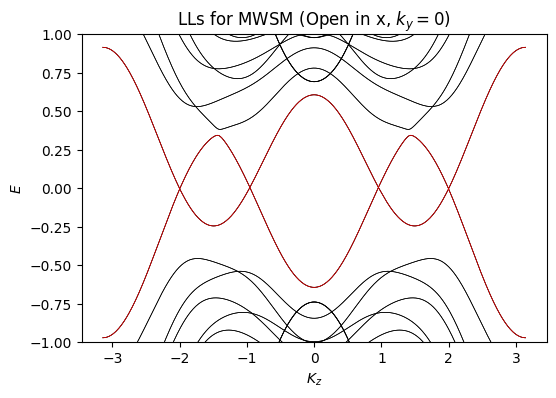

In [4]:
kzs = np.linspace(-np.pi,np.pi, 501)
ky = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky+2*B*i)*tau_y+(2+g1-np.cos(ky+2*B*i)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky+2*B*i)*sigma_y-(2+g2-np.cos(ky+2*B*i)-np.cos(kz))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky+2*B*(i+0.5))*tau_y+(2+g1-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*tau_z
        nVP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky+2*B*(i+0.5))*sigma_y-(2+g2-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*sigma_z
        nVP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM (Open in x, $k_y = 0$)')
ax.set_ylim (-1,1)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

plt.savefig ('LLs for MWSM (Open in x, $k_y = 0$)')

plt.show()

* Without MCI constant vs $k_y$, $k_z = 0$ and $\pi/2$

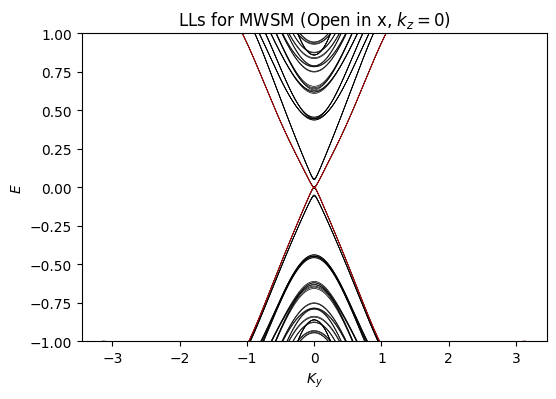

In [5]:
kys = np.linspace(-np.pi,np.pi, 501)
kz = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for ky in kys:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz+2*B*i))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz+2*B*i))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz+2*B*(i+0.5)))*tau_z
        nVP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz+2*B*(i+0.5)))*sigma_z
        nVP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kys, band, color='black', linewidth=0.5)


mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kys,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM (Open in x, $k_z = 0$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM (Open in x, $k_z = 0$)')
plt.show()

<>:72: SyntaxWarning: invalid escape sequence '\p'
<>:72: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maza\AppData\Local\Temp\ipykernel_8524\1455137381.py:72: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title ('LLs for MWSM (Open in x, $k_z = \pi/2$)')


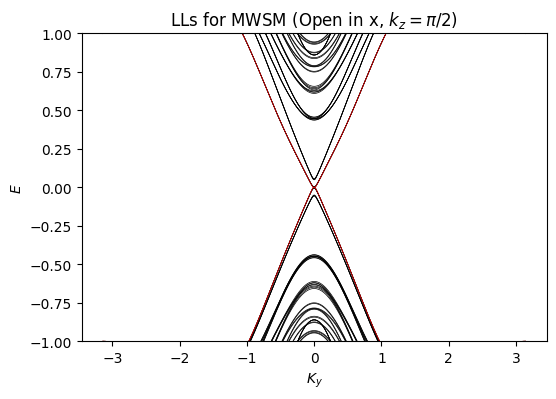

In [6]:
kys = np.linspace(-np.pi,np.pi, 501)
kz = np.pi/2

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for ky in kys:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz+2*B*i))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz+2*B*i))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz+2*B*(i+0.5)))*tau_z
        nVP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz+2*B*(i+0.5)))*sigma_z
        nVP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kys, band, color='black', linewidth=0.5)


mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kys,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM (Open in x, $k_z = \pi/2$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM (Open in x, $k_z = 05pi$)')

plt.show()

* With MCI constant vs $k_z$, $k_y$ = 0

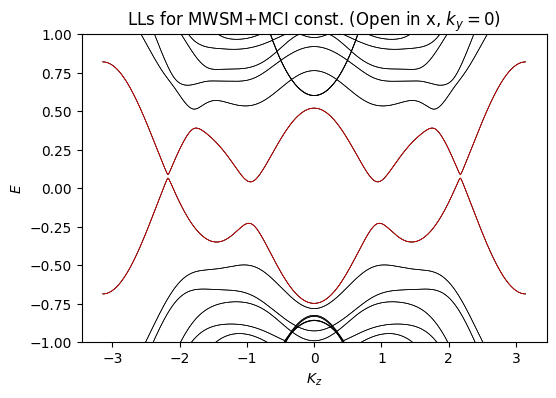

In [7]:
#Parameters
L = 80
kzs = np.linspace(-np.pi,np.pi, 501)
ky = 0

B= 2*np.pi/L
g1, g2 = -0.5, 0.5

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky+2*B*i)*tau_y+(2+g1-np.cos(ky+2*B*i)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky+2*B*i)*sigma_y-(2+g2-np.cos(ky+2*B*i)-np.cos(kz))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky+2*B*(i+0.5))*tau_y+(2+g1-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*tau_z
        nVP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky+2*B*(i+0.5))*sigma_y-(2+g2-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*sigma_z
        nVP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger + hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM+MCI const. (Open in x, $k_y = 0$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM+MCI constant (Open in x, $k_y = 0$)')

plt.show()

* With MCI constant vs $k_y$, $k_z = 0$ and $\pi/2$

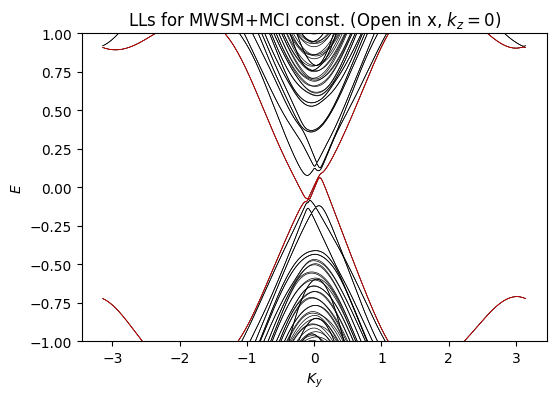

In [8]:
kys = np.linspace(-np.pi,np.pi, 501)
kz = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for ky in kys:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz+2*B*i))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz+2*B*i))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz+2*B*(i+0.5)))*tau_z
        nVP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz+2*B*(i+0.5)))*sigma_z
        nVP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger +hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kys, band, color='black', linewidth=0.5)


mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kys,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM+MCI const. (Open in x, $k_z = 0$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM+MCI constant (Open in x, $k_z = 0$)')

plt.show()

<>:72: SyntaxWarning: invalid escape sequence '\p'
<>:72: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maza\AppData\Local\Temp\ipykernel_8524\3785456695.py:72: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title ('LLs for MWSM+MCI const. (Open in x, $k_z = \pi/2$)')


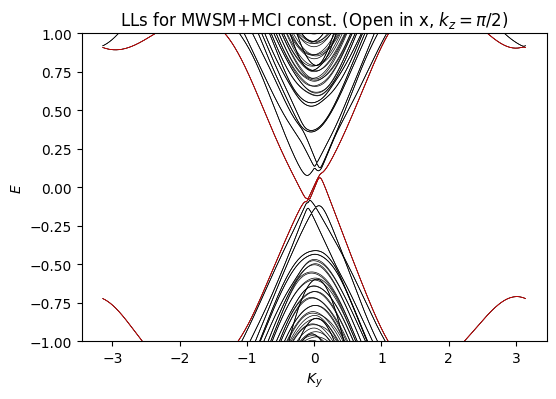

In [9]:
kys = np.linspace(-np.pi,np.pi, 501)
kz = np.pi/2

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for ky in kys:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz+2*B*i))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz+2*B*i))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz+2*B*(i+0.5)))*tau_z
        nVP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz+2*B*(i+0.5)))*sigma_z
        nVP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger +hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kys, band, color='black', linewidth=0.5)


mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kys,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM+MCI const. (Open in x, $k_z = \pi/2$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM+MCI constant (Open in x, $k_z = 05pi$)')
plt.show()

# Open in y

* Without MCI constant vs $k_z$, $k_x$ = 0

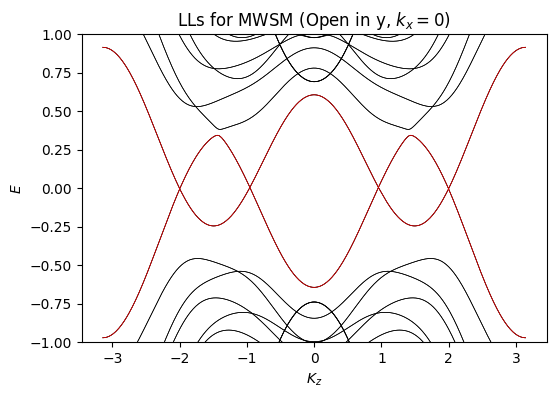

In [10]:
kzs = np.linspace(-np.pi,np.pi, 501)
kx = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(kx+2*B*i)*tau_x+(2+g1-np.cos(kx+2*B*i)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = -np.sin(kx+2*B*i)*sigma_x-(2+g2-np.cos(kx+2*B*i)-np.cos(kz))*sigma_z
        VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        VP_2d = VP_2.conj().T


        nHP_1 = np.sin(kx+2*B*(i+0.5))*tau_x+(2+g1-np.cos(kx+2*B*(i+0.5))-np.cos(kz))*tau_z
        nVP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        nVP_1d = VP_1.conj().T
    
        nHP_2 = -np.sin(kx+2*B*(i+0.5))*sigma_x-(2+g2-np.cos(kx+2*B*(i+0.5))-np.cos(kz))*sigma_z
        nVP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        nVP_2d = VP_2.conj().T

        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM (Open in y, $k_x = 0$)')
ax.set_ylim (-1,1)
plt.savefig ('LLs for MWSM (Open in y, $k_x = 0$)')
plt.show()

* Without MCI constant vs $k_x$, $k_z = 0$ and $\pi/2$

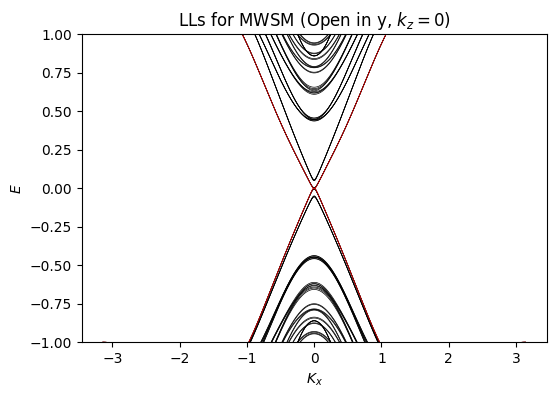

In [11]:
kxs = np.linspace(-np.pi,np.pi, 501)
kz = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kx in kxs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz+2*B*i))*tau_z
        VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz+2*B*i))*sigma_z
        VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        VP_2d = VP_2.conj().T


        nHP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz+2*B*(i+0.5)))*tau_z
        nVP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        nVP_1d = VP_1.conj().T
    
        nHP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz+2*B*(i+0.5)))*sigma_z
        nVP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        nVP_2d = VP_2.conj().T

        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_x$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM (Open in y, $k_z = 0$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM (Open in y, $k_z = 0$)')
plt.show()

In [ ]:
kxs = np.linspace(-np.pi,np.pi, 501)
kz = np.pi/2

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kx in kxs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz+2*B*i))*tau_z
        VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz+2*B*i))*sigma_z
        VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        VP_2d = VP_2.conj().T


        nHP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz+2*B*(i+0.5)))*tau_z
        nVP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        nVP_1d = VP_1.conj().T
    
        nHP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz+2*B*(i+0.5)))*sigma_z
        nVP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        nVP_2d = VP_2.conj().T

        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_x$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM (Open in y, $k_z = \pi/2$)')
ax.set_ylim (-1,1)
plt.savefig ('LLs for MWSM (Open in y, $k_z = 05pi$)')
plt.show()

<>:71: SyntaxWarning: invalid escape sequence '\p'
<>:71: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maza\AppData\Local\Temp\ipykernel_8524\4029162709.py:71: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title ('LLs for MWSM (Open in y, $k_z = \pi/2$)')


* With MCI constant vs $k_z$, $k_x$ = 0

In [ ]:
kzs = np.linspace(-np.pi,np.pi, 501)
kx = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(kx+2*B*i)*tau_x+(2+g1-np.cos(kx+2*B*i)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = -np.sin(kx+2*B*i)*sigma_x-(2+g2-np.cos(kx+2*B*i)-np.cos(kz))*sigma_z
        VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        VP_2d = VP_2.conj().T


        nHP_1 = np.sin(kx+2*B*(i+0.5))*tau_x+(2+g1-np.cos(kx+2*B*(i+0.5))-np.cos(kz))*tau_z
        nVP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        nVP_1d = VP_1.conj().T
    
        nHP_2 = -np.sin(kx+2*B*(i+0.5))*sigma_x-(2+g2-np.cos(kx+2*B*(i+0.5))-np.cos(kz))*sigma_z
        nVP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        nVP_2d = VP_2.conj().T

        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger + hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM+MCI const. (Open in y, $k_x = 0$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM+MCI constant (Open in y, $k_x = 0$)')
plt.show()

* With MCI constant vs $k_x$, $k_z = 0$ and $\pi/2$

In [ ]:
kxs = np.linspace(-np.pi,np.pi, 501)
kz = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kx in kxs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz+2*B*i))*tau_z
        VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz+2*B*i))*sigma_z
        VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        VP_2d = VP_2.conj().T


        nHP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz+2*B*(i+0.5)))*tau_z
        nVP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        nVP_1d = VP_1.conj().T
    
        nHP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz+2*B*(i+0.5)))*sigma_z
        nVP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        nVP_2d = VP_2.conj().T

        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger + hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_x$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM+MCI const. (Open in y, $k_z = 0$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM+MCI constant (Open in y, $k_z = 0$)')

plt.show()

In [ ]:
kxs = np.linspace(-np.pi,np.pi, 501)
kz = 1.1

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kx in kxs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz+2*B*i))*tau_z
        VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz+2*B*i))*sigma_z
        VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        VP_2d = VP_2.conj().T


        nHP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz+2*B*(i+0.5)))*tau_z
        nVP_1 = (-1j/2)*tau_y+(1/2)*tau_z
        nVP_1d = VP_1.conj().T
    
        nHP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz+2*B*(i+0.5)))*sigma_z
        nVP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
        nVP_2d = VP_2.conj().T

        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger + hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_x$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM+MCI const. (Open in y, $k_z = \pi/2$)')
ax.set_ylim (-1,1)
plt.savefig('LLs for MWSM+MCI constant (Open in y, $k_z = 05pi$)')

plt.show()